In [26]:
import numpy as np
import pandas as pd
import json
import re
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
import scipy
import scipy.cluster
from scipy.cluster.hierarchy import dendrogram

In [2]:
S = np.genfromtxt("../datasets/UCR/HandOutlines_emb.csv")

In [11]:
len(np.where(S==1)[0])

768338

In [8]:
S[0,710]

1.0

In [4]:
np.genfromtxt("../datasets/UCR/Mallat_emb.csv")

array([[ 1.        , -0.09900819, -0.08700703, ..., -0.0690608 ,
        -0.11264517, -0.14735693],
       [-0.09900819,  1.        , -0.72396048, ...,  0.9097517 ,
         0.7225208 ,  0.31672545],
       [-0.08700703, -0.72396048,  1.        , ..., -0.63705113,
        -0.29252851,  0.27797315],
       ...,
       [-0.0690608 ,  0.9097517 , -0.63705113, ...,  1.        ,
         0.83461631,  0.46651541],
       [-0.11264517,  0.7225208 , -0.29252851, ...,  0.83461631,
         1.        ,  0.8347241 ],
       [-0.14735693,  0.31672545,  0.27797315, ...,  0.46651541,
         0.8347241 ,  1.        ]])

In [6]:
np.corrcoef([[1,2],[1,-3]])

array([[ 1., -1.],
       [-1.,  1.]])

In [14]:
data_information = json.load(open("../dataset_information.json"))
data_information = json.loads(data_information)

In [70]:

def getTMFGQuality(dataset, method, prefix, version = ""):
    if method=="exact":
        prefix=""
    else:
        prefix="-"+str(prefix)
    true_labels = data_information[dataset]["true_labels"]
    n_cluster = len(np.unique(true_labels))
    Z_dir = "../outputs/Zs/%s-%s-Z%s-0" % (dataset+version, method,prefix)
    Z = np.genfromtxt(Z_dir)
    tmfg_clustering = scipy.cluster.hierarchy.cut_tree(Z, n_clusters=[2]).flatten()
    score = adjusted_rand_score(true_labels, tmfg_clustering)
    info_score = adjusted_mutual_info_score(true_labels, tmfg_clustering)
    return {
        "score":score,
        "info_score":info_score
    }

In [74]:
print(getTMFGQuality("HandOutlines", "prefix", 10, ""))

{'score': 0.06793191167600635, 'info_score': 0.09102134288681973}


In [56]:
version = ""
for prefix in [2, 5, 10, 30, 50]:
    print(getTMFGQuality("HandOutlines", "prefix", prefix, version))
print(getTMFGQuality("HandOutlines", "exact", 1, version))

{'score': 0.027748551212886868, 'info_score': 0.03006146879530695}
{'score': 0.0210047877457988, 'info_score': 0.0039484895004108555}
{'score': 0.07057686466107546, 'info_score': 0.09424921980812555}
{'score': 0.039369729757005506, 'info_score': 0.05813510022857158}
{'score': 0.04435681477140032, 'info_score': 0.06510781154442488}
{'score': 0.33572163221620666, 'info_score': 0.2966791774274821}


In [17]:
data_information.keys()

dict_keys(['Mallat', 'UWaveGestureLibraryAll', 'NonInvasiveFetalECGThorax2', 'MixedShapesRegularTrain', 'MixedShapesSmallTrain', 'ECG5000', 'NonInvasiveFetalECGThorax1', 'MoteStrain', 'HandOutlines', 'UWaveGestureLibraryX', 'CBF', 'InsectWingbeatSound', 'UWaveGestureLibraryY', 'ShapesAll', 'SonyAIBORobotSurface2', 'FreezerSmallTrain'])

In [43]:
true_labels = data_information["HandOutlines"]["true_labels"]

In [24]:
Z_dir = "../debug/outputs/Zs/%s-%s-Z%s-0" % ("HandOutlines", "exact", "")
Z1 = np.genfromtxt(Z_dir)

In [25]:
Z_dir = "../debug/outputs/Zs/%s-%s-Z%s-0" % ("HandOutlines", "prefix", "-2")
Z2 = np.genfromtxt(Z_dir)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [155.0, 155.0, 165.0, 165.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [160.0, 160.0, 183.75, 183.75],
  [145.0, 145.0, 171.875, 171.875],
  [135.0, 135.0, 158.4375, 158.4375],
  [120.0, 120.0, 146.71875, 146.71875],
  [90.0, 90.0, 133.359375, 133.359375],
  [43.75, 43.75, 111.6796875, 111.6796875],
  [12.5, 12.5, 77.71484375, 77.71484375],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [290.0, 290.0, 313.75, 313.75],
  [262.5

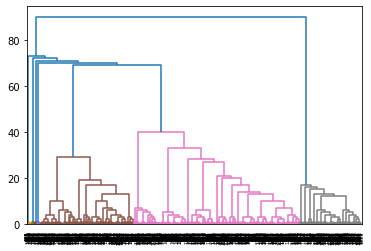

In [27]:
dendrogram(Z1);

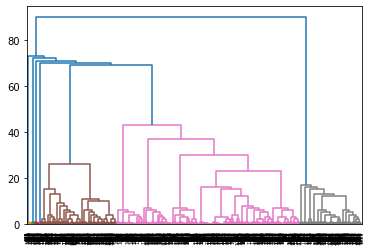

In [55]:
Z_dir = "../debug/outputs/Zs/%s-%s-Z%s-0" % ("HandOutlines_sq", "exact", "")
Z1e = np.genfromtxt(Z_dir)
dendrogram(Z1e);

In [52]:
tmfg_clustering = scipy.cluster.hierarchy.cut_tree(Z2, n_clusters=[2]).flatten()

In [53]:
ct=0
for i in range(len(tmfg_clustering)):
    if tmfg_clustering[i]== true_labels[i]:
        ct=ct+1
print(ct)

897


In [48]:
len(tmfg_clustering)-860

510

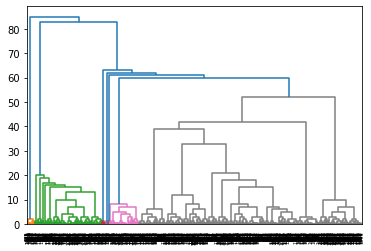

In [28]:
dendrogram(Z2);

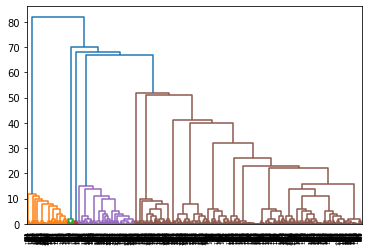

In [31]:
Z_dir = "../debug/outputs/Zs/%s-%s-Z%s-0" % ("HandOutlines", "prefix", "-5")
Z5 = np.genfromtxt(Z_dir)
dendrogram(Z5);

In [57]:
X1 = np.genfromtxt("../datasets/UCRArchive_2018/HandOutlines/HandOutlines_TRAIN.tsv", delimiter="\t")

In [58]:
X1.shape

(1000, 2710)

In [60]:
X1[0]

array([ 0.       , -2.6393017, -2.6393017, ..., -2.6393017, -2.6393017,
       -2.6393017])

In [61]:
import matplotlib.pyplot as plt

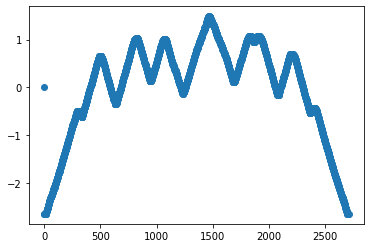

In [62]:
plt.scatter(range(2710), X1[0])

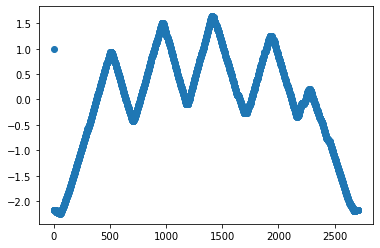

In [63]:
plt.scatter(range(2710), X1[1])

In [65]:
X1 = np.genfromtxt("../datasets/UCRArchive_2018/UWaveGestureLibraryX/UWaveGestureLibraryX_TRAIN.tsv", delimiter="\t")

In [67]:
X1.shape

(896, 316)

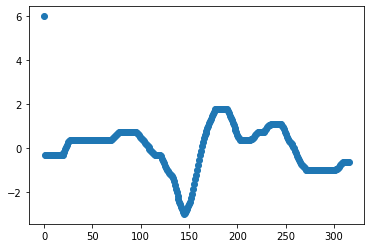

In [68]:
plt.scatter(range(316), X1[0])

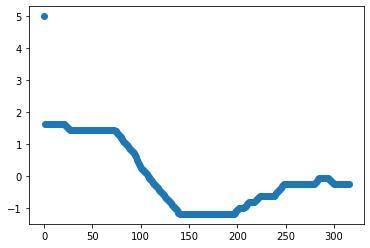

In [69]:
plt.scatter(range(316), X1[1])

In [75]:
import pickle

In [82]:
d = pickle.load(open("../datasets/valid_stockdata_1319.pickle","rb"))

In [83]:
len(d.keys())

2441